# WEB PISHING DATASET

## Importação, Análise e Pré-processamento dos Dados

### Importação

In [91]:
pip install pandas scipy numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


Website Phishing é um banco de dados que tem como objetivo detectar sites de phishing na web, problema real a respeito da segurança da informação.

In [92]:
import pandas as pd
from scipy.io import arff

# Caminho para o arquivo ARFF
file_path = "./PhishingData.arff"

# Carregar os dados do arquivo ARFF
data, meta = arff.loadarff(file_path)

# Converter para um DataFrame do pandas
df = pd.DataFrame(data)

Ao baixar o dataset, nos foi retornado um arquivo .arff, utilizamos scipy para a leitura dele e posteriormente o trasnformamos em um DataFrame.

A seguir iremos entender um pouco mais sobre a sua estrutura e como os dados são apresentados.

In [93]:
#Exibir o número de linhas e colunas
print(f"WebPhishing possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Exibir os nomes das colunas
print("Nomes das colunas:")
print(df.columns.tolist())

WebPhishing possui 1353 linhas e 10 colunas.
Nomes das colunas:
['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address', 'Result']


In [94]:
#Exibir os tipos dos dados e número de valores nulos
print(f"Tipos dos dados:\n{df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB
Tipos dos dados:
None


Nota-se a não presença de valores ausentes, o que nos dá um trabalho a menos.

In [95]:
#Exibir as primeiras 5 linhas do DataFrame
print(f"Primeiras 5 linhas:\n{df.head()}")

Primeiras 5 linhas:
     SFH popUpWidnow SSLfinal_State Request_URL URL_of_Anchor web_traffic  \
0   b'1'       b'-1'           b'1'       b'-1'         b'-1'        b'1'   
1  b'-1'       b'-1'          b'-1'       b'-1'         b'-1'        b'0'   
2   b'1'       b'-1'           b'0'        b'0'         b'-1'        b'0'   
3   b'1'        b'0'           b'1'       b'-1'         b'-1'        b'0'   
4  b'-1'       b'-1'           b'1'       b'-1'          b'0'        b'0'   

  URL_Length age_of_domain having_IP_Address Result  
0       b'1'          b'1'              b'0'   b'0'  
1       b'1'          b'1'              b'1'   b'1'  
2      b'-1'          b'1'              b'0'   b'1'  
3       b'1'          b'1'              b'0'   b'0'  
4      b'-1'          b'1'              b'0'   b'1'  


### Conversão de Unidades

In [96]:
# Converter as colunas de bytes para inteiros
for coluna in df.columns:
    df[coluna] = df[coluna].str.decode('utf-8').astype(int)

df.head()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


WebPhishing é agrupado em 9 features com seus dados representados de maneira categórica em 3 diferentes tipos: '-1' (negativo), '0'(neutro), '1'(positivo), o resultado é expresso em uma feature 'Result', tambem categórico: '-1' (Phishing), '0' (Neutro), '1' (Legítimo).

In [97]:
#Exibir as variáveis únicas
print(f"Variáveis únicas:\n{df.nunique()}")

Variáveis únicas:
SFH                  3
popUpWidnow          3
SSLfinal_State       3
Request_URL          3
URL_of_Anchor        3
web_traffic          3
URL_Length           3
age_of_domain        2
having_IP_Address    2
Result               3
dtype: int64


Aqui podemos ver a variação dos dados apresentada em cada coluna, com ressalvas para age_of_domain e having_IP_Address que apresentaram apenas dois tipos de variação.

In [98]:
#Verificando a existência de valores ruídos
for col in df.columns:
    print(f"{col}: {sorted(df[col].unique())}")

SFH: [np.int64(-1), np.int64(0), np.int64(1)]
popUpWidnow: [np.int64(-1), np.int64(0), np.int64(1)]
SSLfinal_State: [np.int64(-1), np.int64(0), np.int64(1)]
Request_URL: [np.int64(-1), np.int64(0), np.int64(1)]
URL_of_Anchor: [np.int64(-1), np.int64(0), np.int64(1)]
web_traffic: [np.int64(-1), np.int64(0), np.int64(1)]
URL_Length: [np.int64(-1), np.int64(0), np.int64(1)]
age_of_domain: [np.int64(-1), np.int64(1)]
having_IP_Address: [np.int64(0), np.int64(1)]
Result: [np.int64(-1), np.int64(0), np.int64(1)]


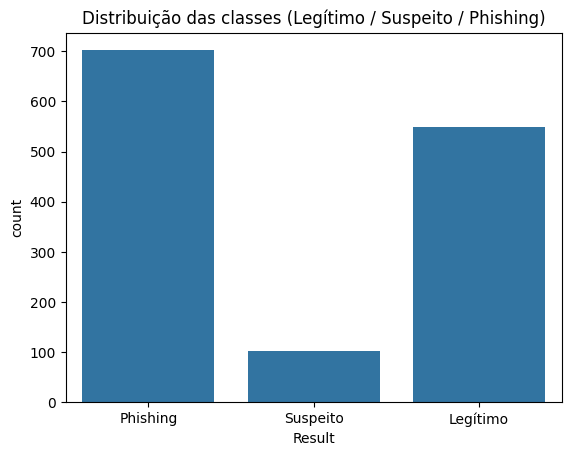

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Result', data=df)
plt.title('Distribuição das classes (Legítimo / Suspeito / Phishing)')
plt.xticks(ticks=[0, 1, 2], labels=['Phishing', 'Suspeito', 'Legítimo'])
plt.show()


Podemos ver que a maioria dos sites são legítimos, seguidos por sites suspeitos e, por último, os sites de phishing. Isso pode indicar que o conjunto de dados é desbalanceado, o que pode afetar o desempenho dos modelos de aprendizado de máquina. Portanto, será importante considerar técnicas de balanceamento de classes ao treinar modelos com esses dados.

### Análise de Correlação

Como queremos prever se um site é phishing ou não, podemos estabelecer que nosso atributo alvo é 'Result'.

Vamos ver portanto, atributos que estão mais correlacionados com nosso atributo alvo.

In [100]:
# Converter tudo de bytes para string
df = df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Converter para int (se apropriado)
df = df.astype(int)

# Verificar os tipos de dados após a conversão
print(f"Tipos dos dados após conversão:\n{df.dtypes}")


Tipos dos dados após conversão:
SFH                  int64
popUpWidnow          int64
SSLfinal_State       int64
Request_URL          int64
URL_of_Anchor        int64
web_traffic          int64
URL_Length           int64
age_of_domain        int64
having_IP_Address    int64
Result               int64
dtype: object


In [101]:
correlation = df.corr(numeric_only=True)['Result'].sort_values(key=abs, ascending=False)
print(correlation)

Result               1.000000
SFH                 -0.678277
SSLfinal_State      -0.518762
popUpWidnow         -0.509749
URL_of_Anchor       -0.287007
Request_URL         -0.271609
web_traffic          0.243896
age_of_domain       -0.231931
URL_Length          -0.183061
having_IP_Address   -0.059225
Name: Result, dtype: float64


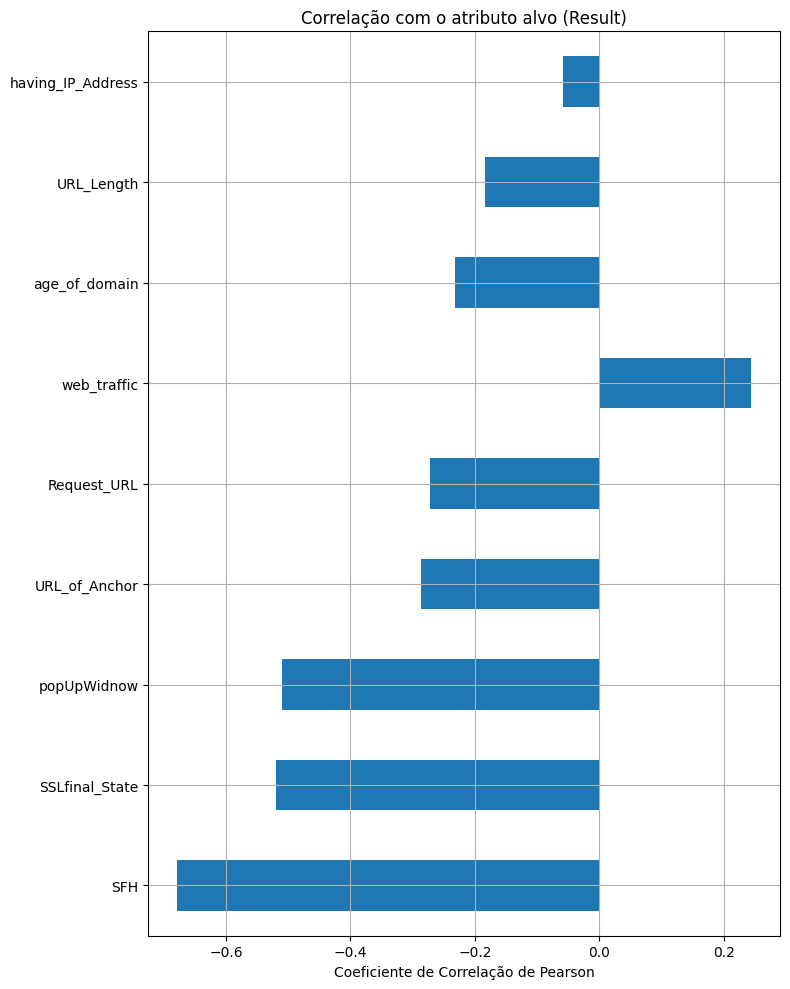

In [102]:
correlation.drop('Result').plot(kind='barh', figsize=(8, 10))
plt.title('Correlação com o atributo alvo (Result)')
plt.xlabel('Coeficiente de Correlação de Pearson')
plt.grid(True)
plt.tight_layout()
plt.show()

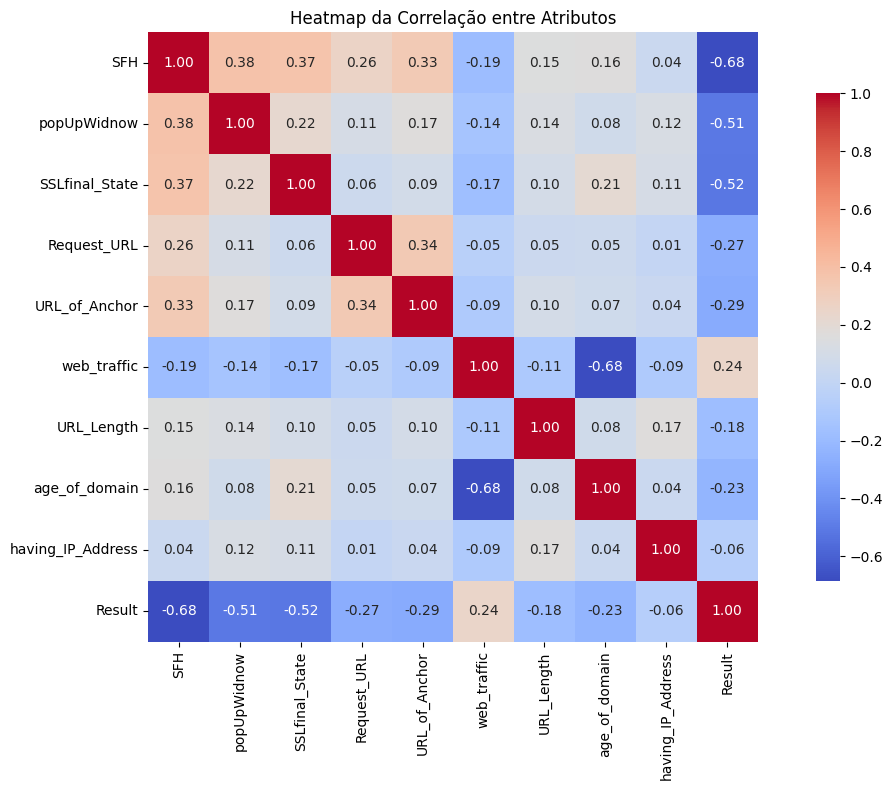

In [103]:
# Heatmap da correlação

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Heatmap da Correlação entre Atributos')

plt.tight_layout()  
plt.show()

### Análise de Correlação

Com base nas visualizações de correlação:

1. O **gráfico de barras** mostra o coeficiente de correlação de Pearson entre cada feature e o target. Valores próximos de 1 ou -1 indicam uma forte correlação, enquanto valores próximos de 0 indicam uma correlação fraca (força absoluta).

- `SFH`: Apresenta a correlação mais forte com 'Result' (aprox. -0.68). Forte correlação negativa. À medida que o valor de SFH muda, a probabilidade de phishing muda significativamente na direção oposta.
- `SSLfinal_state`: Segunda correlação mais forte (aprox. -0.52).
- `popUpWindow`: Correlação negativa significativa (aprox. -0.51).
- `URL_of_Anchor`: Correlação negativa moderada (aprox. -0.47).
- `Request_URL`: Correlação negativa moderada (aprox. -0.29).
- `web_traffic`: Correlação positiva moderada (aprox. 0.24). A correlação positiva mais proeminente. À medida que o tráfego da web aumenta, a probabilidade de phishing também aumenta.
- `age_of_domain`: Correlação negativa moderada (aprox. -0.23).
- `URL_Length`: Correlação negativa mais fraca (aprox. -0.18).
- `having_IP_Address`: Correlação negativa muito fraca (aprox. -0.06). Pouca influência na previsão de phishing.

2. O **heatmap** mostra a mesma informação, mas de uma maneira diferente. As cores mais escuras indicam uma correlação mais forte, enquanto as cores mais claras indicam uma correlação mais fraca. A correlação entre 'Result' e 'SFH' é a mais forte, seguida por 'SSLfinal_state' e 'popUpWindow'.
- As correlações entre as principais características (ex: SFH, SSLfinal_State, popUpWidnow) e outras características são geralmente baixas a moderadas (principalmente abaixo de |0,4|). Por exemplo, SFH e popUpWidnow é 0,38; SFH e SSLfinal_State é 0,37. Esses valores não são altos o suficiente para sugerir redundância extrema entre os principais preditores de 'Result'.
- - URL_of_Anchor e Request_URL têm uma correlação de 0,34, que é moderada, mas aceitável.

### Conclusão da Análise

As melhores features são aquelas que possuem uma correlação mais forte com o target e não são excessivamente redundantes entre si. Portanto, as features mais relevantes para prever phishing são:

1. `SFH`
2. `SSLfinal_state`
3. `popUpWindow`
4. `URL_of_Anchor`
5. `Request_URL`
6. `web_traffic`
7. `age_of_domain`

### Justificativa

- Exibem os maiores coeficientes de correlação com o target, indicando uma relação linear mais forte com a probabilidade de phishing.
- O mapa de calor mostra que, embora algumas dessas fetures tenham correlações entre si, elas não são tão altas a ponto de sugerir redundância extrema. Isso significa que cada uma delas traz informações únicas para o modelo.
- Features como `having_IP_Address` e `URL_Length` têm correlações mais fracas com o target e também são mais redundantes entre si, tornando-as menos úteis para a previsão de phishing.

## USO DE MODELOS PREDITIVOS PARA OBTER AS PREDIÇÕES

In [118]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["Result"])
y = df["Result"]

kf = KFold(n_splits=5, shuffle=True, random_state=42)

### KNN Classification Model

In [106]:
from sklearn.model_selection import GridSearchCV

# hiperparâmetro que será testado
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 15],
}

# Cria o GridSearchCV usando o KFold que você já definiu
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=kf, scoring='accuracy', n_jobs=-1)

# Executa a busca
grid_search.fit(X, y)

# Imprime o melhor hiperparâmetro e o melhor score
print("Melhor Hiperparâmetro:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

Melhor Hiperparâmetro: {'n_neighbors': 3}
Melhor acurácia: 0.8721279212792128


In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline


knn = KNeighborsClassifier(n_neighbors=3)
knn_scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# SEM ESCALONAMENTO DE FEATURES
knn_results_no_scaling = cross_validate(knn, X, y, cv=kf, scoring=knn_scoring)

# COM ESCALONAMENTO
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
knn_results_with_scaling = cross_validate(pipeline, X, y, cv=kf, scoring=scoring)

# Resultados
knn_df_results = pd.DataFrame({
    'Sem Escalonamento': [knn_results_no_scaling[f'test_{m}'].mean() for m in scoring],
    'Com Escalonamento': [knn_results_with_scaling[f'test_{m}'].mean() for m in scoring]
}, index=['Acurácia', 'Precisão', 'Revocação', 'F1-Score'])

knn_df_results


,Sem Escalonamento,Com Escalonamento
Acurácia,0.872128,0.850690
Precisão,0.838442,0.797042
Revocação,0.817021,0.767355
F1-Score,0.825138,0.777717


### Visualização Gráfica KNN

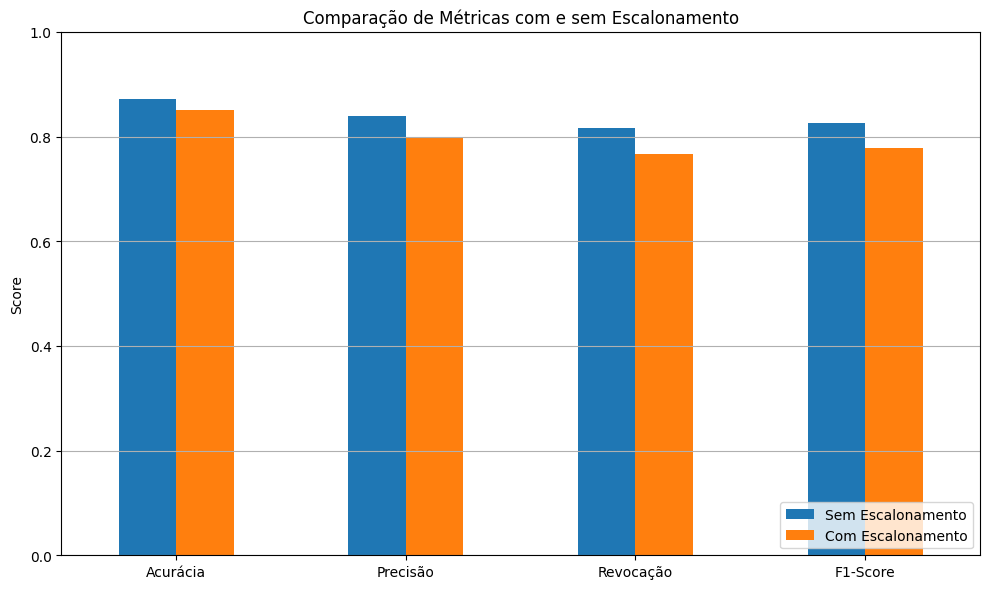

In [123]:
knn_df_results.plot(kind='bar', figsize=(10,6))
plt.title('Comparação de Métricas com e sem Escalonamento')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()